<p style="font-size: 30px; color: #2586be;"> <b> Import Libraries </b> </p>


In [81]:
import numpy as np
import pandas as pd
import tabulate as tab
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn


<p style="font-size: 30px; color: #2586be;"> <b> Load Data </b> </p>


In [82]:
df = pd.read_csv("HDFC.csv")

## Preview Data


In [83]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [84]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,10-Apr-2024,EQ,"1,549.90","1,549.90","1,532.95","1,548.55","1,534.95","1,536.35","1,539.41","1,757.50","1,363.55","1,39,03,700","21,40,35,51,158.35","2,64,951"
1,09-Apr-2024,EQ,"1,554.85","1,554.85","1,540.30","1,546.60","1,544.40","1,548.55","1,547.47","1,757.50","1,363.55","1,09,42,247","16,93,27,84,193.35","2,86,447"
2,08-Apr-2024,EQ,"1,554.95","1,557.25","1,541.55","1,549.55","1,545.00","1,546.60","1,546.80","1,757.50","1,363.55","1,02,41,470","15,84,14,81,181.95","2,82,686"
3,05-Apr-2024,EQ,"1,539.00","1,554.50","1,530.15","1,527.60","1,550.05","1,549.55","1,545.34","1,757.50","1,363.55","2,95,27,951","45,63,07,07,255.45","4,46,260"
4,04-Apr-2024,EQ,"1,504.00","1,530.00","1,504.00","1,482.30","1,529.00","1,527.60","1,520.65","1,757.50","1,363.55","4,44,67,533","67,61,97,06,935.10","6,38,189"


+ Data Summary

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           126 non-null    object
 1   series         126 non-null    object
 2   OPEN           126 non-null    object
 3   HIGH           126 non-null    object
 4   LOW            126 non-null    object
 5   PREV. CLOSE    126 non-null    object
 6   ltp            126 non-null    object
 7   close          126 non-null    object
 8   vwap           126 non-null    object
 9   52W H          126 non-null    object
 10  52W L          126 non-null    object
 11  VOLUME         126 non-null    object
 12  VALUE          126 non-null    object
 13  No of trades   126 non-null    object
dtypes: object(14)
memory usage: 13.9+ KB


+ Missing Values

In [86]:
df.isnull().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

<p style="font-size: 60px; color: #2586be;"> <b> 
Data Preprocessing </b> </p>


In [87]:
print(df.dtypes)


Date             object
series           object
OPEN             object
HIGH             object
LOW              object
PREV. CLOSE      object
ltp              object
close            object
vwap             object
52W H            object
52W L            object
VOLUME           object
VALUE            object
No of trades     object
dtype: object


+ Remove leading and trailing spaces from column names


In [88]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

df.columns

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')

In [89]:
df = df.drop(columns=['series', '52W L', '52W H'])
df.columns

Index(['Date', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap',
       'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')

In [90]:
# Convert the 'Date' column to datetime with a specific format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')


+ Remove Commas from DataFrame Columns

In [91]:

# Iterate through each column and remove commas
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.replace(',', '')

# Save the modified DataFrame back to a CSV file
df.to_csv("HDFC_New_DF.csv", index=False)

# Read the modified CSV file back into a DataFrame
df = pd.read_csv("HDFC_New_DF.csv")


In [92]:
# Drop the 'Date' column
numeric_df = df.drop(columns=['Date'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()



In [93]:
from tabulate import tabulate

# Convert the DataFrame to a table using Tabulate
table = tabulate(correlation_matrix, tablefmt='grid',headers='keys' ,floatfmt='.2f', numalign='center', stralign='center')

# Print the table
print(table)


+--------------+--------+--------+-------+---------------+-------+---------+--------+----------+---------+----------------+
|              |  OPEN  |  HIGH  |  LOW  |  PREV. CLOSE  |  ltp  |  close  |  vwap  |  VOLUME  |  VALUE  |  No of trades  |
+==============+========+========+=======+===============+=======+=========+========+==========+=========+================+
|     OPEN     |  1.00  |  0.99  | 0.99  |     0.99      | 0.98  |  0.98   |  0.99  |  -0.22   |  -0.14  |     -0.18      |
+--------------+--------+--------+-------+---------------+-------+---------+--------+----------+---------+----------------+
|     HIGH     |  0.99  |  1.00  | 0.99  |     0.99      | 0.99  |  0.99   |  1.00  |  -0.19   |  -0.11  |     -0.15      |
+--------------+--------+--------+-------+---------------+-------+---------+--------+----------+---------+----------------+
|     LOW      |  0.99  |  0.99  | 1.00  |     0.98      | 0.99  |  0.99   |  1.00  |  -0.25   |  -0.17  |     -0.23      |
+-------

+ Convert DataFrame to Table Using Tabulat

In [94]:
from tabulate import tabulate

# Convert the DataFrame to a table using Tabulate
table = tabulate(df, tablefmt='fancy_grid',headers='keys' ,floatfmt='.2f', numalign='center', stralign='center')

# Print the table
print(table)


╒═════╤════════════╤═════════╤═════════╤═════════╤═══════════════╤═════════╤═════════╤═════════╤══════════╤═════════════════╤════════════════╕
│     │    Date    │  OPEN   │  HIGH   │   LOW   │  PREV. CLOSE  │   ltp   │  close  │  vwap   │  VOLUME  │      VALUE      │  No of trades  │
╞═════╪════════════╪═════════╪═════════╪═════════╪═══════════════╪═════════╪═════════╪═════════╪══════════╪═════════════════╪════════════════╡
│  0  │ 2024-04-10 │ 1549.90 │ 1549.90 │ 1532.95 │    1548.55    │ 1534.95 │ 1536.35 │ 1539.41 │ 13903700 │ 21403551158.35  │     264951     │
├─────┼────────────┼─────────┼─────────┼─────────┼───────────────┼─────────┼─────────┼─────────┼──────────┼─────────────────┼────────────────┤
│  1  │ 2024-04-09 │ 1554.85 │ 1554.85 │ 1540.30 │    1546.60    │ 1544.40 │ 1548.55 │ 1547.47 │ 10942247 │ 16932784193.35  │     286447     │
├─────┼────────────┼─────────┼─────────┼─────────┼───────────────┼─────────┼─────────┼─────────┼──────────┼─────────────────┼────────────────┤

<p style="font-size: 40px; color: #2586be;"> <b> 
Exploratory Data Analysis (EDA)  </b> </p>


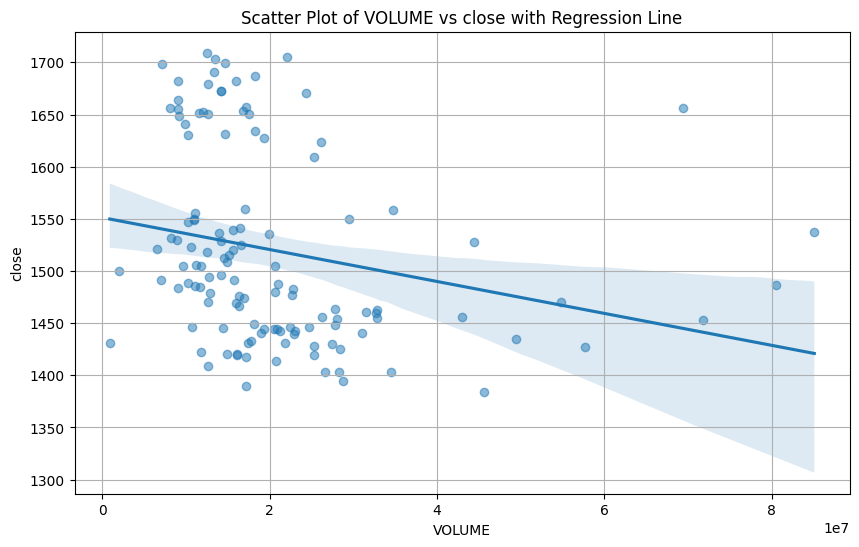

In [95]:
import seaborn as sns

# Plot 'VOLUME' against 'close' with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='VOLUME', y='close', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of VOLUME vs close with Regression Line')
plt.xlabel('VOLUME')
plt.ylabel('close')
plt.grid(True)
plt.show()


+ `Univariate Analysis`

+ `Bivariate Analysis`

+ `Multivariate Analysis`

<p style="font-size: 30px; color: #2586be;"> <b> Test & Training </b> </p>


In [96]:
from sklearn.model_selection import train_test_split

In [97]:
print("Column names:", df.columns)

Column names: Index(['Date', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close', 'vwap',
       'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')


In [98]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime format
df['Year'] = df['Date'].dt.year  # Extract year
df['Month'] = df['Date'].dt.month  # Extract month
df['Day'] = df['Date'].dt.day  # Extract day

# Define feature set and target variable
X = df[['Year', 'Month', 'Day', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'VOLUME', 'VALUE']]
y = df['close']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (100, 10)
Shape of X_test: (26, 10)
Shape of y_train: (100,)
Shape of y_test: (26,)


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()

In [101]:
from sklearn.linear_model import LinearRegression

# Assuming X_train, X_test, y_train, y_test are defined
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Print the predictions
print(predictions)


[1684.38644795 1459.78311712 1507.22167566 1675.87183984 1521.35272264
 1651.10609274 1419.69684122 1430.25336603 1522.55325825 1442.31083306
 1528.51671279 1486.27605575 1416.45053223 1505.60828411 1653.78363054
 1459.07999461 1559.8677137  1424.29531664 1474.37044231 1442.0538431
 1442.2504272  1429.14074699 1646.94385454 1535.96366649 1486.78541943
 1392.73413167]


In [102]:
# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.044718428523085


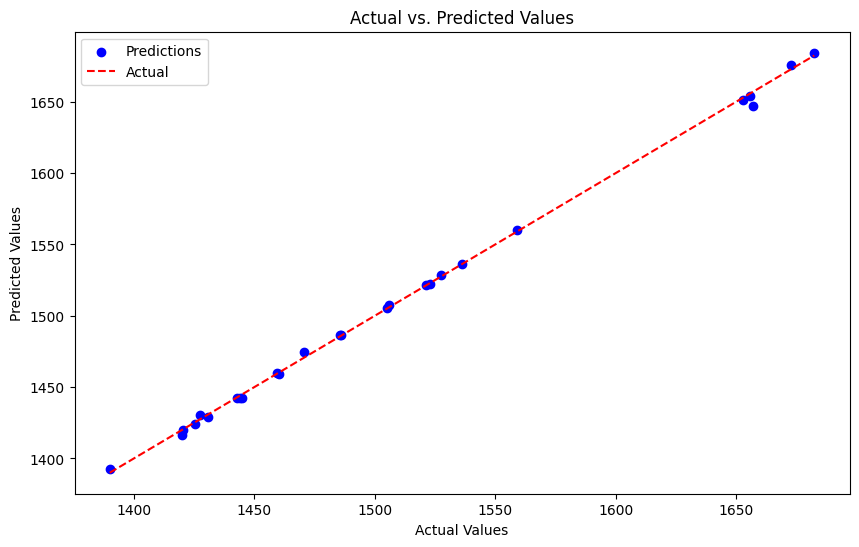

In [103]:
import matplotlib.pyplot as plt

# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


<p style="font-size: 30px; color: #2586be;"> <b> Feature scaling</b> </p>


<p style="font-size: 30px; color: #2586be;"> <b> Time Series Analysis  </b> </p>




<p style="font-size: 30px; color: #2586be;"> <b> Feature selection  </b> </p>

<p style="font-size: 30px; color: #2586be;"> <b> Reinforcement Learning  </b> </p>